# Linear Regression (Not Generalized)

## This is Simple Linear Regression on Advertising dataset (TV vs sales)

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df = df.drop(['radio','newspaper'],axis=1)
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


## Train Test Split

In [5]:
l = [1,2,3,4,5]
print(l[:-1])
print(l[-1])

[1, 2, 3, 4]
5


In [6]:
x = df['TV']
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [7]:
x.ndim

1

#### Here the dimension of x is 1 which will cause error in train test split ,since tran test split expects x to be 2 dimensional.

#### so the way we can do is 
#### i)  x = np.array(df['TV']).reshape(len(x),1)
#### ii) x = df[['TV']]
#### ii) x = df[df.columns[:-1]] 

In [8]:
# x = np.array(df['TV']).reshape(len(x),1)
# x
# x.ndim

In [9]:
# x = df[['TV']]
# x
# x.ndim

In [10]:
x = df[df.columns[:-1]]
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [11]:
x.ndim

2

In [12]:
y = df[df.columns[-1:]]
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [13]:
y.ndim

2

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
x_train

,TV
131,265.2
96,197.6
181,218.5
19,147.3
153,171.3
...,...
67,139.3
192,17.2
117,76.4
47,239.9


In [16]:
y_train

,sales
131,12.7
96,11.7
181,12.2
19,14.6
153,19.0
...,...
67,13.4
192,5.9
117,9.4
47,23.2


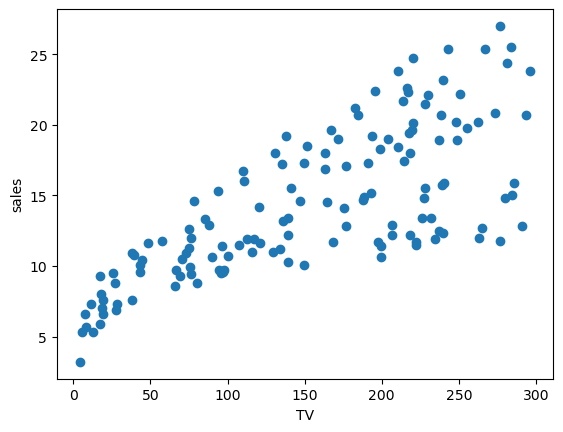

In [17]:
if len(x_train.columns) == 1:
    plt.scatter(x_train[x_train.columns[0]],y_train[y_train.columns[0]])
    plt.xlabel(x_train.columns[0])
    plt.ylabel(y_train.columns[0])

## Simple Linear Regression

In [18]:
x_train.columns

Index(['TV'], dtype='object')

In [19]:
x_train.index

Int64Index([131,  96, 181,  19, 153,  92,  54, 163,  51,  86,
            ...
             87,  36,  21,   9, 103,  67, 192, 117,  47, 172],
           dtype='int64', length=140)

In [20]:
x_train['TV'][131]

265.2

In [21]:
x_train['TV'][96]

197.6

In [22]:
y_train.iloc[0]

sales    12.7
Name: 131, dtype: float64

In [23]:
y_train.loc[131]

sales    12.7
Name: 131, dtype: float64

.iloc is used for numerical order but .loc is used for categorical.

In [24]:
y_train.loc[131] + 2

sales    14.7
Name: 131, dtype: float64

In [25]:
y_train[y_train.columns[0]][131]

12.7

In [28]:
# finding coefficients (b)

b = list()
sum_xi_yi = 0
sum_xi_2 = 0
sum_xi = 0
sum_yi = 0

for feature in x_train.columns:
    for i in x_train.index:
        sum_xi_yi = sum_xi_yi + x_train[feature][i] * y_train[y_train.columns[0]][i]
        sum_xi_2 = sum_xi_2 + x_train[feature][i] ** 2
        sum_xi = sum_xi + x_train[feature][i]
        sum_yi = sum_yi + y_train[y_train.columns[0]][i]
    
    n = len(x_train)

    x_mean = sum_xi / n
    y_mean = sum_yi / n 
    
    temp_b = ( sum_xi_yi - n * x_mean * y_mean ) / ( sum_xi_2 - n * (x_mean**2) )
    b.append(temp_b)
    
    # sum_xi_yi = 0
    # sum_xi_2 = 0
    # sum_xi = 0
    # sum_yi = 0

print(b)

[0.045814342171896144]


In [29]:
# findin intercept (b0)

b0 = y_mean

for i in range(len(b)):
    b0 = b0 - b[i] * x_train[x_train.columns[i]].mean()

b0

7.310810165411697

In [107]:
# Testing Purpose

test_b0 = (sum_yi*sum_xi_2-sum_xi*sum_xi_yi) / (n*sum_xi_2 - sum_xi ** 2)
print(test_b0) 

test_b1 = (n*sum_xi_yi - sum_xi*sum_yi) / (n*sum_xi_2 - sum_xi ** 2)
print(test_b1)

7.310810165411699
0.045814342171896144


In [200]:
x_test

,TV
18,69.2
170,50.0
107,90.4
98,289.7
177,170.2
182,56.2
5,8.7
146,240.1
12,23.8
152,197.6


In [201]:
# y_prediction

y_cap = list()
y_prediction = 0

for row in x_test.index:
    for i in range(len(x_test.columns)):
        y_prediction = y_prediction + b[i] * x_test[x_test.columns[i]][row]
    
    y_prediction = y_prediction + b0
    y_cap.append(y_prediction)
    y_prediction = 0

y_cap

[10.48116264370691,
 9.601527274006504,
 11.452426697751108,
 20.583225092610007,
 15.108411203068421,
 9.885576195472261,
 7.709394942307194,
 18.310833720883963,
 8.401191509102825,
 16.363724178578373,
 19.28209777492816,
 11.30582080280104,
 14.485336149530632,
 15.914743625293793,
 10.811025907344563,
 12.817694094473612,
 19.479099446267313,
 7.342880204932024,
 10.73314152565234,
 17.087590784894335,
 20.48701497404903,
 13.738562372128726,
 15.332901479710712,
 13.34455902945042,
 9.761877471608141,
 12.950555686772113,
 14.897665229077699,
 16.70275031065041,
 17.57322281191643,
 8.46075015392629,
 10.417022564666254,
 16.42328282340184,
 20.170896013062944,
 18.384136668358995,
 7.915559482080726,
 8.167538364026155,
 10.041344958856707,
 15.59404323009052,
 10.444511169969394,
 8.456168719709101,
 9.001359391554665,
 8.753961943826425,
 13.857679661775656,
 16.913496284641127,
 17.179219469238127,
 12.015943106465432,
 7.7048135080900035,
 8.085072548116742,
 13.069672976419

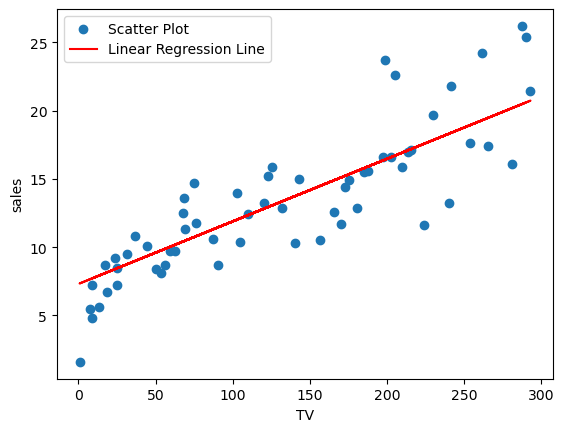

In [202]:
if len(x_test.columns) == 1:
    plt.scatter(x_test[x_test.columns[0]],y_test[y_test.columns[0]],label='Scatter Plot')
    plt.plot(x_test[x_test.columns[0]],y_cap,color='red',label='Linear Regression Line')
    plt.xlabel(x_test.columns[0])
    plt.ylabel(y_test.columns[0])
    plt.legend()

## Model Evaluation on Test Dataset

In [203]:
y_test

,sales
18,11.3
170,8.4
107,8.7
98,25.4
177,11.7
182,8.7
5,7.2
146,13.2
12,9.2
152,16.6


In [204]:
y_test.loc[18]['sales']

11.3

In [205]:
y_test.iloc[0]['sales']

11.3

In [206]:
y_test['sales'][18]

11.3

In [207]:
# y_test['sales'][0]
# error

In [208]:
print(len(y_cap))
print(x_test.shape)
print(y_test.shape)

60
(60, 1)
(60, 1)


In [209]:
# R Square

y_mean = y_test[y_test.columns[0]].mean()

sum1 = 0
sum2 = 0

for i in range(len(y_cap)):
    diff = y_test.iloc[i][y_test.columns[0]] - y_cap[i] 
    sum1 = sum1 + (diff ** 2)

for i in y_test.index:
    diff = y_test[y_test.columns[0]][i] - y_mean
    sum2 = sum2 + (diff ** 2)

r2 = 1 - (sum1 / sum2)

print(r2)

0.7256063465970728


In [210]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_cap)
print(r2)

0.7256063465970728


In [211]:
# MSE

sum1 = 0

for i in range(len(y_cap)):
    diff = y_test.iloc[i][y_test.columns[0]] - y_cap[i] 
    sum1 = sum1 + (diff ** 2)

mse = sum1 / (len(y_cap))
print(mse)

7.4974795934646785


In [212]:
# RMSE

rmse = np.sqrt(mse)
rmse
print(rmse)

2.7381525876883996


In [213]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_cap)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

7.49747959346468
2.7381525876883996


# This above code only works for 1 independent variable

# _______________________________________________________________

# Process of Generalization Starts......

In [37]:
temp = x_train.reset_index()
temp

,index,TV
0,131,265.2
1,96,197.6
2,181,218.5
3,19,147.3
4,153,171.3
...,...,...
135,67,139.3
136,192,17.2
137,117,76.4
138,47,239.9


In [41]:
temp['TV'].sum()

21527.9

In [40]:
temp[temp.columns[1]].sum()

21527.9

In [43]:
temp[temp.columns[1]]

0      265.2
1      197.6
2      218.5
3      147.3
4      171.3
       ...  
135    139.3
136     17.2
137     76.4
138    239.9
139     19.6
Name: TV, Length: 140, dtype: float64

In [45]:
temp[temp.columns[1]] * temp[temp.columns[1]]

0      70331.04
1      39045.76
2      47742.25
3      21697.29
4      29343.69
         ...   
135    19404.49
136      295.84
137     5836.96
138    57552.01
139      384.16
Name: TV, Length: 140, dtype: float64

In [47]:
(temp[temp.columns[1]] * temp[temp.columns[1]]).sum()

4295969.569999999

In [59]:
sum = 0
for i in range(len(x_train)):
    sum = sum + temp['TV'][i] * temp['TV'][i]
print(sum)

4295969.57


In [48]:
(temp[temp.columns[1]] * y_train[y_train.columns[0]]).sum()

224174.3

In [50]:
x_train

,TV
131,265.2
96,197.6
181,218.5
19,147.3
153,171.3
...,...
67,139.3
192,17.2
117,76.4
47,239.9


In [54]:
x_train.iloc[0]['TV']

265.2

In [51]:
y_train

,sales
131,12.7
96,11.7
181,12.2
19,14.6
153,19.0
...,...
67,13.4
192,5.9
117,9.4
47,23.2


In [53]:
y_train.iloc[0]['sales']

12.7

In [52]:
sum = 0
for i in range(len(x_train)):
    sum = sum + x_train.iloc[i]['TV'] * y_train.iloc[i]['sales']
print(sum)

354203.41000000003


In [57]:
(x_train['TV'] * y_train['sales']).sum()

354203.41

In [58]:
temp['TV'] * y_train['sales']

0      5860.92
1      2055.04
2      2032.05
3      2725.05
4          NaN
        ...   
195        NaN
196        NaN
197        NaN
198        NaN
199        NaN
Length: 181, dtype: float64

In [64]:
(temp['TV'].values * y_train['sales'].values).sum()

354203.41

In [94]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [95]:
A.shape

(3, 3)

In [96]:
H = np.array([[1],[1],[1]])
print(H)

[[1]
 [1]
 [1]]


In [97]:
H.shape

(3, 1)

In [99]:
l = list()

for j in range(3):
    temp_A = A.copy()
    temp_A[:,j] = H.reshape(3,)
    l.append(temp_A)

print(l)

[array([[1, 2, 3],
       [1, 5, 6],
       [1, 8, 9]]), array([[1, 1, 3],
       [4, 1, 6],
       [7, 1, 9]]), array([[1, 2, 1],
       [4, 5, 1],
       [7, 8, 1]])]


In [100]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [106]:
np.linalg.det(A)

-9.51619735392994e-16

In [103]:
for i in l:
    print(np.linalg.det(i))

0.0
1.3322676295501906e-15
-1.141943682471589e-15


# All done , now time to implement the generalized version that will work for 1,2,3....n number of independent variables